# Ethnicity Prediction

In [1]:
from __future__ import division, print_function, absolute_import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Experiment 1: Exploring Dataset

Read the sample dataset using panda dataframe

In [2]:
ethnea_df = pd.read_csv('names_ethnea_genni_country_sample.csv')
ethnea_df

,AUID,Last,First,Ethnea,Genni,PubCountry
0,12872768_1,_Filho_,_Elias_Abdalla_,HISPANIC,M,Brazil
1,12565879_3,_Bou_Abdallah_,_Jad_,ARAB,M,France
2,17569133_1,_Abdel_Aziz_,_Ayman_,ARAB,M,USA
3,11213157_2,_Abdelmoula_,_Salma_,ARAB,F,Tunisia
4,11439058_1,_Abdou_,_Ibrahim_,ARAB,M,Egypt
5,10919608_3,_Abou_El_Fettouh_,_Hazem_,ARAB,M,USA
6,17314740_3,_Aboutaam_,_Rola_,ARAB,F,France
7,16564217_2,_Alvim_de_Abreu_Silva_Rodrigues_,_Aida_Alexandra_,HISPANIC,F,Brazil
8,6339395_2,_Cristina_Affonso_Scaletsky_,_Isabel_,HISPANIC,F,Brazil
9,7796089_2,_Agbenyega_,_Tsiri_,AFRICAN,-,Ghana


- Build a name_series list that combine first_name and last_name form the dataframe.
- Do replace the `_` character with space, and strip the left and right space.
- Transform all name data into uppercase letter
- Make an ethnic_series based on the Ethnea field on the dataframe

In [3]:
#combine first_name and last_name
name_series = ethnea_df['Last'] + ethnea_df['First']
name_series = name_series.replace('_',' ',regex=True)
name_series = name_series.str.strip()
name_series = name_series.str.upper()

#extract ethnicity rows
ethnic_series = ethnea_df.Ethnea.values

Make a name_dict which contains ethnicity pair for the name. Useful to build a name frequency and P(name|ethnicity)

In [4]:
#make a name vector from all the dataset
name_dict = {}
for i,name_i in enumerate(name_series.str.split(' ')):
    for name in name_i:
        if name != '':
            if name not in name_dict:
                name_dict[name] = []
            name_dict[name].append(ethnic_series[i])

Get Total vocabulary of names 

In [5]:
# total 
len(name_dict)

34834

In [6]:
name_dict

{'FILHO': ['HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC'],
 'ELIAS': ['HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'ARAB',
  'ARAB',
  'ENGLISH',
  'HISPANIC',
  'HISPANIC',
  'HISPANIC',
  'GREEK'],
 'ABDALLA': ['HISPANIC', 'ARAB', 'ARAB', 'ARAB'],
 'BOU': ['ARAB'],
 'ABDALLAH': ['ARAB', 'ARAB', 'ARAB', 'FRENCH'],
 'JAD': ['ARAB'],
 'ABDEL': ['ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB'],
 'AZIZ': ['ARAB', 'ARAB', 'ARAB', 'ARAB', 'ARAB'],
 'AYMAN': ['ARAB', 'ARAB'],
 'ABDELMOULA': ['ARAB', 'ARAB'],
 'SALMA': ['ARAB', 'ARAB'],
 'ABDOU': ['ARAB'],
 'IBRAHIM': ['ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'AFRICAN',
  'AFRICAN',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'ARAB',
  'TURKISH',
  'ARAB',
  'ARAB'],
 'ABOU': ['ARAB', 'ARAB', 'ARAB', 'ARAB', 'ARAB'],
 'EL': ['ARAB',
  'ARAB',
  'AR

In [7]:
# assume ethnic is a document
ethnic_dict = {}
for i,ethnic_i in enumerate(ethnic_series):
    if ethnic_i not in ethnic_dict:
        ethnic_dict[ethnic_i] = []
    # split the name
    split_name = name_series[i].split(' ')
    for name_j in split_name:
        if name_j!='':
            ethnic_dict[ethnic_i].append(name_j)

In [8]:
ethnic_keys = list(ethnic_dict.keys())
name_keys = list(name_dict.keys())

Some insight about distribution on the sample dataset, we can see that we have inbalance dataset in which English has more distribution compare to the others.

In [9]:
# P(Name=n)
total_observation = len(ethnic_series)
n_name = len(name_keys)
n_ethnic = len(ethnic_keys)

prob_name = {}
for name_i in name_keys:
    prob_name[name_i] = len(name_dict[name_i])/total_observation

# P(Ethnic=e)
prob_ethnic = {}
for ethnic_i in ethnic_keys:
    prob_ethnic[ethnic_i] = len(ethnic_dict[ethnic_i])/total_observation
    
# P(Name = n|Ethnic=e), conditional probability of name belong to some ethnic, 
# should produce matrix
# of the name and ethnicity
prob_name_ethnic = np.zeros([n_name,n_ethnic])
total_join = 0
for name_i,ethnic_i in name_dict.items():
    for ethnic_j in ethnic_i:
        prob_name_ethnic[name_keys.index(name_i),ethnic_keys.index(ethnic_j)]+=1
        total_join+=1

# compute the probability by dividing frequency with total_join
prob_name_ethnic = prob_name_ethnic / total_join

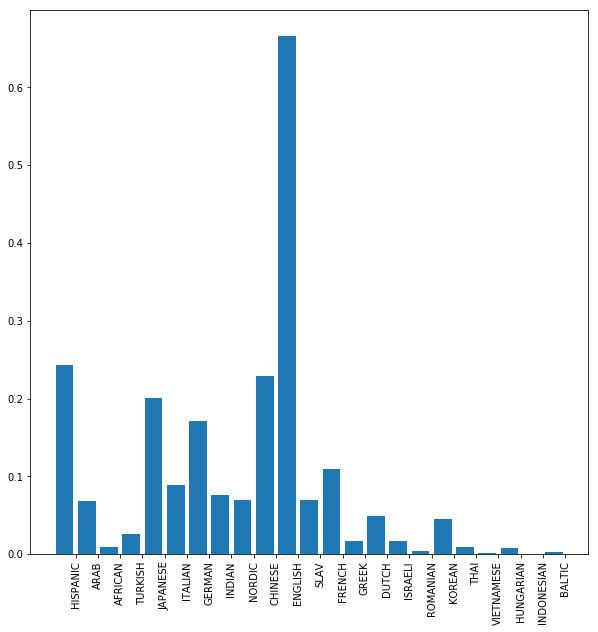

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
ax_bar = ax.bar(range(len(ethnic_keys)),prob_ethnic.values())
plt_xticks = plt.xticks(np.array(range(len(ethnic_keys)))+0.5, prob_ethnic.keys(), rotation='vertical')

Let us do some simple bayesian probability theorem first.
From the dictionary and dataset above we can compute these probabilities:
- P(Name = n)
- P(Ethnic = e)
- P(Name = n|Ethnic = e) => probability of a name given ethnic
- P(Ethnic = e | Name = n) = (P(Ethnic = e) * P(Name =n|Ethnic=e)) / P(Name = n)

Next we try to calculate the Probability of the Ethnic given Name. There are several assumptions that I made on this case
- Name can be more than one word
- Every word in one name is treated independently. Therefore, we can do probability join as multiplication process
- Curse of zero probability: there is no zero probability, every zero probability will be treated as very small number (epsilon) to avoid multiply by zero calculation

In [11]:
# assume there is no 0 probability, only small number of chance
epsilon = 1E-8

# compute the probability of ethnic given name by doing the bayes
# P(Ethnic = e | Name = n) = (P(Ethnic = e) * P(Name=n|Ethnic=e)) / P(Name = n)
# let say P(Ethnic=e|Name=name)
def prob_ethnic_one(name):
    prob_ethnic_result = np.zeros(n_ethnic)
    for ethnic_i,prob in prob_ethnic.items():
        prob_ethnic_result[ethnic_keys.index(ethnic_i)] = prob * prob_name_ethnic[name_keys.index(name),ethnic_keys.index(ethnic_i)] / prob_name[name]
    # normalized
    prob_ethnic_result = prob_ethnic_result + epsilon
    return prob_ethnic_result

def prob_ethnic_name(name):
    # assume the name can contain more than one word independent each other
    # we join the probability by multiplying the probability of their name
    name_split = name.split(' ')
    prob_ethnic_result = np.ones(n_ethnic)
    for name_i in name_split:
        if name_i != '':
            prob_ethnic_result = prob_ethnic_result * prob_ethnic_one(name_i.upper())
    # normalized
    prob_ethnic_result = prob_ethnic_result / prob_ethnic_result.sum()
    sort_index = prob_ethnic_result.argsort()[::-1]    
    sorted_result = []
    for ind in sort_index:
        sorted_result.append({ethnic_keys[ind]: prob_ethnic_result[ind]})
    return prob_ethnic_result, sorted_result


In [12]:
prob_ethnic_name('ingo glockner')

(array([  9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          7.10782469e-01,   9.04434692e-08,   2.89215632e-01,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08,   9.04434692e-08,
          9.04434692e-08,   9.04434692e-08]),
 [{'GERMAN': 0.71078246870764872},
  {'NORDIC': 0.28921563197949712},
  {'BALTIC': 9.0443469236324672e-08},
  {'ENGLISH': 9.0443469236324672e-08},
  {'ARAB': 9.0443469236324672e-08},
  {'AFRICAN': 9.0443469236324672e-08},
  {'TURKISH': 9.0443469236324672e-08},
  {'JAPANESE': 9.0443469236324672e-08},
  {'ITALIAN': 9.0443469236324672e-08},
  {'INDIAN': 9.0443469236324672e-08},
  {'CHINESE': 9.0443469236324672e-08},
  {'SLAV': 9.0443469236324672e-08},
  {'INDONESIAN': 9.0443469236324672e-08},
  {'FRENCH': 9.0443469236

## Experiment 2 - Importance of Embedding

From the previous experiment, we can see that from the dataset we can produce the probability distribution between name and ethnicity and later build a model to infer the ethnicity given a series of names.

However, our names exploration are limited to the names that exist on the vocabulary extracted from the dataset only. What if the model is challenged by names that don't exist yet in the vocabulary. From this problem, we notice the importance of word embedding in this name-ethnicity prediction.

The word embedding is a technique to interpret the word, phrases or set of text to a continues vector space with lower dimension. After we produce the vector, we can use the information to compute similarity or distance between two words that can be used to predict the most similar word for the unknown vocabulary.

In [17]:
# Start doing DNN for the name embedding
# combine first name and last name
full_name = ethnea_df['First']+ethnea_df['Last']

In [18]:
def extract_structure(word,n_char=4):
    x_struct = []
    word_len = len(word) + n_char
    n_char-=1
    counter = 0
    for i in range(word_len):
        end = i+1
        start = (i - n_char) if (i - n_char) > 0 else 0
        if word[start:end]!='_':
            x_struct.append(word[start:end])
    return x_struct

#extract_structure('_Elias_Abdalla__Filho_')
full_name_struct = full_name.apply(lambda x: extract_structure(x))

struct_dict = {}
for name_struct_i in full_name_struct:
    for struct_j in name_struct_i:
        if struct_j not in struct_dict:
            struct_dict[struct_j]=0
        struct_dict[struct_j]+=1

In [19]:
len(struct_dict.keys())

62695

In [20]:
struct_dict

{'_E': 1076,
 '_El': 303,
 '_Eli': 166,
 'Elia': 21,
 'lias': 19,
 'ias_': 133,
 'as_A': 1,
 's_Ab': 1,
 '_Abd': 85,
 'Abda': 8,
 'bdal': 9,
 'dall': 39,
 'alla': 103,
 'lla_': 227,
 'la__': 585,
 'a__F': 256,
 '__Fi': 175,
 '_Fil': 53,
 'Filh': 11,
 'ilho': 12,
 'lho_': 33,
 'ho_': 81,
 'o_': 2961,
 '': 44567,
 '_J': 2965,
 '_Ja': 675,
 '_Jad': 10,
 'Jad_': 1,
 'ad__': 148,
 'd__B': 194,
 '__Bo': 459,
 '_Bou': 68,
 'Bou_': 1,
 'ou_A': 3,
 'u_Ab': 1,
 'llah': 29,
 'lah_': 32,
 'ah_': 62,
 'h_': 1254,
 '_A': 2590,
 '_Ay': 45,
 '_Aym': 8,
 'Ayma': 4,
 'yman': 32,
 'man_': 704,
 'an__': 2225,
 'n__A': 258,
 '__Ab': 142,
 'Abde': 26,
 'bdel': 29,
 'del_': 80,
 'el_A': 11,
 'l_Az': 5,
 '_Azi': 8,
 'Aziz': 5,
 'ziz_': 8,
 'iz_': 40,
 'z_': 982,
 '_S': 2824,
 '_Sa': 598,
 '_Sal': 138,
 'Salm': 9,
 'alma': 21,
 'lma_': 26,
 'ma__': 162,
 'a__A': 351,
 'delm': 7,
 'elmo': 11,
 'lmou': 4,
 'moul': 3,
 'oula': 9,
 'ula_': 74,
 'la_': 256,
 'a_': 4732,
 '_I': 502,
 '_Ib': 9,
 '_Ibr': 15,
 'Ibra': 

# lets make neural network implementation

import tensorflow as tf
from tensorflow.contrib import rnn
import random

learning_rate = 0.01
training_steps = 1000
batch_size=5000
#batch_size=1
display_step=5

# define number of inputs and timesteps
#timesteps = 50
timesteps = full_name_struct.apply(lambda x: len(x)).max()
num_input = 1
#timesteps = 1
#num_input = full_name_struct.apply(lambda x: len(x)).max()
# define maximum n_input for the neural network as the maximum structure in vocabulary
# num_input = full_name_struct.apply(lambda x: len(x)).max()

# Define weights and biases
n_ethnicity = len(ethnic_keys)
n_hidden = 200
n_hidden_add = [1000, 500, 200] 

tf.reset_default_graph()

# TF Graph input
#X = tf.placeholder("float",[None,timesteps,num_input])
X = tf.placeholder("float",[num_input,batch_size,timesteps])
Y = tf.placeholder("float",[None,n_ethnicity])


weights = {
    'out': tf.Variable(tf.random_normal([n_hidden,n_ethnicity]),dtype=tf.float32)
}
biases = {
    'out': tf.Variable(tf.random_normal([n_ethnicity]),dtype=tf.float32)
}

"""
weights = {
    'hidden1': tf.Variable(tf.random_normal([n_hidden[0],n_hidden[1]])),
    'hidden2': tf.Variable(tf.random_normal([n_hidden[1],n_hidden[2]])),
    'out': tf.Variable(tf.random_normal([n_hidden[2],n_ethnicity]),dtype=tf.float32)
}
biases = {
    'hidden1': tf.Variable(tf.random_normal([n_hidden[1]])),
    'hidden2': tf.Variable(tf.random_normal([n_hidden[2]])),
    'out': tf.Variable(tf.random_normal([n_ethnicity]),dtype=tf.float32)
}
"""

# make RNN
def  RNN(x,weight,biases,scope_name='lstm'):
#    with tf.variable_scope(scope_name):
    #x = tf.unstack(x, timesteps, 1)
    
    #print(x)  
    #lstm_cell = rnn.BasicLSTMCell(n_hidden,forget_bias=1.0,activation=tf.nn.tanh)
    #outputs, states = rnn.static_rnn(lstm_cell,x,dtype=tf.float32,sequence_length = 50)
    #outputs, states = rnn.static_rnn(lstm_cell,x,dtype=tf.float32)
    num_layers = 2
    state_placeholder = tf.placeholder(tf.float32,[num_layers,n_hidden,timesteps,batch_size])
    #print(state_placeholder)
    l = tf.unstack(state_placeholder,axis=0)
    rnn_tuple_state = tuple(
        [tf.nn.rnn_cell.LSTMStateTuple(l[idx][0],l[idx][1]) for idx in range(num_layers)]
    )
    #print(rnn_tuple_state)
    #cell = tf.nn.rnn_cell.LSTMCell(timesteps, state_is_tuple=True)
    #cell = tf.nn.rnn_cell.MultiRNNCell([cell]*num_layers, state_is_tuple=True)
    # stacked RNN
    stacked_layers = []
    for i in range(3):
        #stacked_layers.append(tf.nn.rnn_cell.LSTMCell(num_units=timesteps,state_is_tuple=True))
        stacked_layers.append(rnn.BasicLSTMCell(n_hidden_add[i],activation=tf.nn.tanh,state_is_tuple=True))
    #cell = tf.nn.rnn_cell.MultiRNNCell(cells=stacked_layers, state_is_tuple=True)
    cell = tf.nn.rnn_cell.MultiRNNCell(cells=stacked_layers,state_is_tuple=True)
   
    outputs, states = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)
    #print(weights['out'])
    print('outputs {}'.format(outputs[-1]))

    return tf.matmul(outputs[-1],weights['out'])+biases['out']

logits = RNN(X,weights,biases)
prediction = tf.nn.softmax(logits)
print(prediction)
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# initialize the variables
init = tf.global_variables_initializer()

In [24]:
# embedd the structure vocabulary using text embedding and reduce the dimensionality

# convert the names into word structure vector
struct_dict_keys = list(struct_dict.keys())

def transform_structure(name_struct):
    list_structure = []
    for x in name_struct:
        list_structure.append(struct_dict_keys.index(x)+1)
    #add pading 0 for structure less than num_input
    #for i in range(len(list_structure),timesteps):
    #    list_structure.append(0)
    return list_structure   
    #return [*map(lambda x:struct_dict_keys.index(x)+1, name_struct)]

data_source = full_name_struct.apply(lambda x: transform_structure(x))


#]labels = list(map(lambda x:y = np.zeros(len(ethnic_keys));y[ethnic_keys.index(x)]=1,ethnic_series))

#embedding_size = 1000
#embeds = tf.contrib.layers.embed_sequence()

In [25]:
def transform_labels(x):
    y = np.zeros(len(ethnic_keys))
    y[ethnic_keys.index(x)]=1
    return y

labels = np.array(list(map(lambda x: transform_labels(x),ethnic_series)))

def generate_batch(data_source,labels,batch_size):
    data_source = data_source[0:20000]
    n_source = len(data_source)
    #start = data_index
    #end = data_index+batch_size if data_index+batch_size < n_source else n_source+1
    #data_index=end
    my_sample = random.sample(range(len(data_source)),batch_size)   
    return np.array(list(data_source[my_sample])), np.array(labels[my_sample])

data_index = 0
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, training_steps+1):
        batch_x,batch_y = generate_batch(test,labels,batch_size)
        # reshape data to get the input element
        batch_x = batch_x.reshape((num_input,batch_size,timesteps))
        #print(batch_x.shape)
        sess.run(train_op, feed_dict={X:batch_x,Y:batch_y})
        if step % display_step ==0 or step==1:
            loss,acc = sess.run([loss_op,accuracy], feed_dict={X:batch_x,Y:batch_y})
            
            print('Step: '+str(step)+", Minibatch Loss="+\
                  '{:.4f}'.format(loss) + ', Training accuracy= '+\
                  '{:.3f}'.format(acc))
    print('Optimization finished')

from tflearn.datasets import imdb

tran,test, _ = imdb.load_data(path='imdb.pkl',n_words=10000,valid_portion=0.1)

In [28]:
# using tflearn make the graph creation simple
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from sklearn.model_selection import train_test_split

tf.reset_default_graph()

# separate train and training set
trainX, testX, trainY, testY = train_test_split(data_source,[ethnic_keys.index(x) for x in ethnic_series],test_size = 0.2)

trainX = pad_sequences(trainX, maxlen=50,value=0.)
testX = pad_sequences(testX,maxlen=50,value=0.)
# Converting labels to binary vectors
trainY = to_categorical(trainY,nb_classes=len(ethnic_keys))
testY = to_categorical(testY,nb_classes=len(ethnic_keys))
    

In [29]:
# Building the graph network
batch_size=1000
net = tflearn.input_data([None, 50])
# reduce dimensionality using word embedding transform the name structure into 1000 dimensions
net = tflearn.embedding(net,input_dim=len(struct_dict_keys)+1,output_dim = 1000)
#net = tflearn.lstm(net,512, dropout=0.8, dynamic=True)
net = tflearn.lstm(net,1000, dropout=0.8)
net = tflearn.fully_connected(net, len(ethnic_keys), activation='softmax')
net = tflearn.regression(net,optimizer='adam',learning_rate=0.001,loss='categorical_crossentropy')

In [39]:
# Training
model = tflearn.DNN(net,tensorboard_verbose=0,best_checkpoint_path='./best_check',checkpoint_path='./check')

In [40]:
model.fit(trainX,trainY,validation_set=(testX,testY),show_metric=True,batch_size=batch_size,snapshot_epoch=True)

---------------------------------
Run id: D6H9SQ
Log directory: /tmp/tflearn_logs/
---------------------------------
Training samples: 35653
Validation samples: 8914
--


KeyboardInterrupt: 

In [36]:
# save train and test set in pickle
import pickle
from sklearn.model_selection import train_test_split


# separate train and training set
trainX, testX, trainY, testY = train_test_split(data_source,[ethnic_keys.index(x) for x in ethnic_series],test_size = 0.2)

trainX = pad_sequences(trainX, maxlen=50,value=0.)
testX = pad_sequences(testX,maxlen=50,value=0.)
# Converting labels to binary vectors
trainY = to_categorical(trainY,nb_classes=len(ethnic_keys))
testY = to_categorical(testY,nb_classes=len(ethnic_keys))

#with open('traintest.pickle', 'wb') as f:
#    pickle.dump((trainX,testX,trainY,testY),f)

In [37]:
# save the ethnic_keys and name_struct keys

with open('traintest.pickle', 'rb') as f:
    trainX,testX,trainY,testY = pickle.load(f)


In [30]:
import pickle
with open('ethic_keys.pickle','wb') as f:
    pickle.dump((struct_dict_keys,ethnic_keys),f)

In [27]:
ethnic_keys

['HISPANIC',
 'ARAB',
 'AFRICAN',
 'TURKISH',
 'JAPANESE',
 'ITALIAN',
 'GERMAN',
 'INDIAN',
 'NORDIC',
 'CHINESE',
 'ENGLISH',
 'SLAV',
 'FRENCH',
 'GREEK',
 'DUTCH',
 'ISRAELI',
 'ROMANIAN',
 'KOREAN',
 'THAI',
 'VIETNAMESE',
 'HUNGARIAN',
 'INDONESIAN',
 'BALTIC']